# Importing needed Lib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
df = pd.read_csv('chicago_data.csv', index_col = 0)

In [3]:
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,avgTemp
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018-01-01,-18.9
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018-01-01,-18.9
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,2018-01-01,-18.9
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,2018-01-01,-18.9
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,2018-01-01,-18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603077,21742438,2018-12-31 23:45:17,2018-12-31 23:50:05,2931,288.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Female,1983.0,2018-12-31,1.3
3603078,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0,2018-12-31,1.3
3603079,21742440,2018-12-31 23:50:09,2018-12-31 23:57:16,4927,427.0,41,Federal St & Polk St,52,Michigan Ave & Lake St,Subscriber,Female,1995.0,2018-12-31,1.3
3603080,21742441,2018-12-31 23:55:04,2018-12-31 23:58:24,1350,200.0,141,Clark St & Lincoln Ave,118,Sedgwick St & North Ave,Subscriber,Male,1999.0,2018-12-31,1.3


In [4]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
dtype: object

In [5]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.dtypes

trip_id                       int64
start_time                   object
end_time                     object
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
date                 datetime64[ns]
avgTemp                     float64
dtype: object

# a line plot of the temperatures for 2018 plotted as time series using the weather dataframe.

In [7]:
# Load the dataset from a CSV file
temperature_df = pd.read_csv('Chicago_Average_Temperature.csv')

<Axes: >

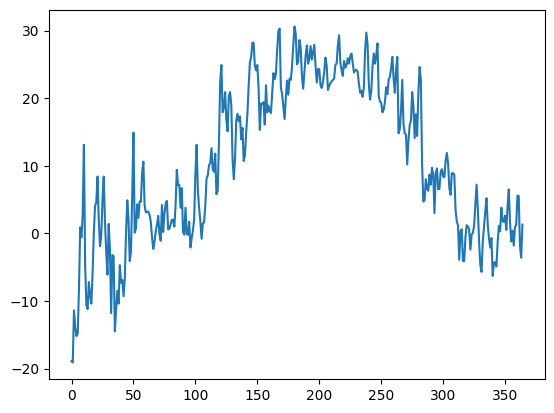

In [8]:
temperature_df['avgTemp'].plot()

# Grouping count of trips per day and merge it with the weather dataframe.

In [9]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [10]:
df_group.head(5)

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [11]:
df_group.rename(columns = {'trip_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          3603082
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (376, 16)
Shape of January 2nd is (1637, 16)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       'bike_rides_daily', '_merge'],
      dtype='object')


In [12]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9,376,both


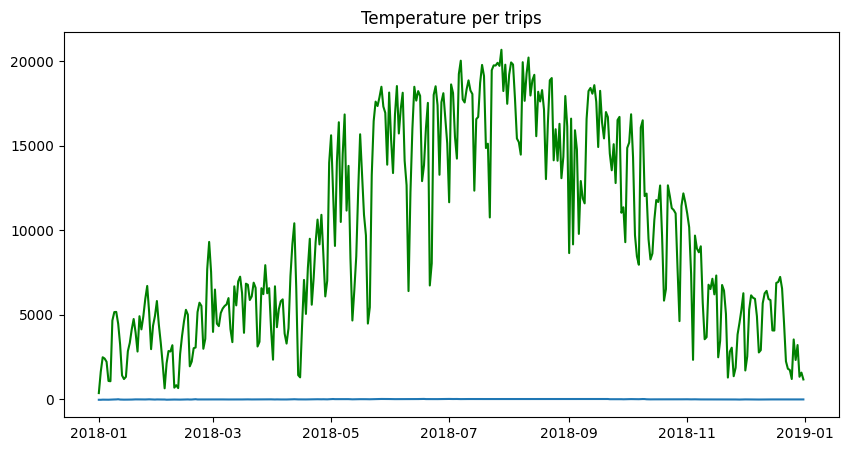

In [19]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'g')
plt.show()

# Plot line chart of bike trip counts and temperatures plotted on a dual axis.

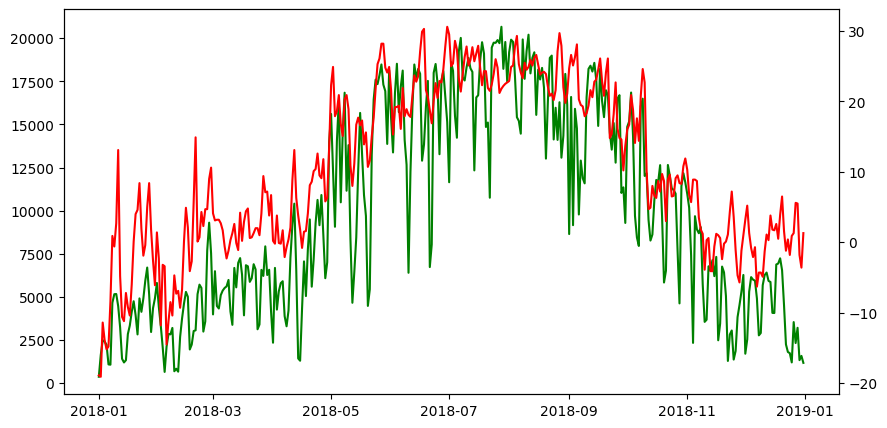

In [18]:
# plot figure and axis objects with subplots() on single plot 

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "g")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "r")
plt.show()

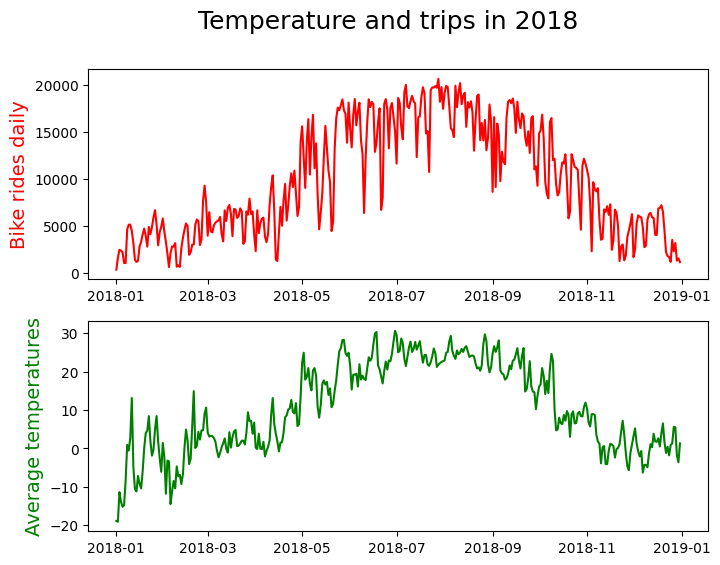

In [24]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "red")
ax[0].set_ylabel("Bike rides daily",color = "red", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "green")
ax[1].set_ylabel("Average temperatures", color = "green",fontsize=14)
plt.suptitle('Temperature and trips in 2018', fontsize = 18)

plt.show()

# brief explaination code

- ax1 = plt.subplots() creates the first axis (primary y-axis).
- ax2 = ax1.twinx() creates the second axis (secondary y-axis) that shares the same x-axis as ax1.
- The first plot uses the ax1 object, and the second plot uses the ax2 object.
- We use different colors for the two y-axes and their respective data plots to make the plot more readable.

In [25]:
# save the plot as a file
fig.savefig('Temperature_and_trips_2018_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
